Task - 3 


•	Write a procedure that can detect if a given signed graph is balanced or weakly balanced or can determine the smallest~$k$ such that the graph is $k$-balanced.

In [1]:
import random
import itertools
import networkx as nx
import matplotlib.pyplot as plt
import re
import matplotlib.colors as mcolors
import time
from datetime import timedelta

In [2]:
def read_signed_graph_from_file(file_path):
    graph = {}
    with open(file_path, 'r') as file:
        for line in file:
            source, target, weight = map(int, line.strip().split())
            if source not in graph:
                graph[source] = []
            if target not in graph:
                graph[target] = []
            graph[source].append((target, weight))
            graph[target].append((source, weight))
    return graph

def generate_random_signed_graphs(n, p_plus, p_minus):
    if p_plus + p_minus >= 1:
        raise ValueError("p+ + p- should be less than 1.")

    signed_graph = []

    # Generate edges with positive, negative, or no sign based on probabilities
    all_edges = list(itertools.combinations(range(n), 2))
    
    for edge in all_edges:
        prob = random.random()
        if prob < p_plus:
            sign = 1
        elif prob < p_plus + p_minus:
            sign = -1
        else:
            continue

        u, v = edge
        signed_graph.append((u, v, {'sign': sign}))

    return signed_graph

def preparing_graph_edges(random_graph):
    graph = {}
    for nodes in random_graph: 
        source, target, weight = nodes
        if source not in graph:
            graph[source] = []
        if target not in graph:
            graph[target] = []
        graph[source].append((target, weight['sign']))
        graph[target].append((source, weight['sign']))
    return graph


def find_pos_and_neg(graph):
    for node in graph:
        pos[node] = []
        neg[node] = []
        for nei, sign in graph[node]:
            if sign == 1:
                pos[node].append(nei)
            else:
                neg[node].append(nei)
        
        for node in pos[node]:
            if node not in all_pos_node:
                all_pos_node.append(node)
        

def generate_cluster(clu, all_pos_node):
    index = 0
    is_checks = True
    while is_checks:
        start_node = random.choice(all_pos_node)
        clu.append(pos[start_node])
        for vlu in clu[index]:
            if vlu in all_pos_node: 
                all_pos_node.remove(vlu) 
        
        for nodes in clu[index]:
            for value in pos[nodes]:
                if value not in clu[index]:
                    clu[index].append(value)
                    if value in all_pos_node: 
                        all_pos_node.remove(value)
                  
        if not all_pos_node:
            is_checks = False  
        index += 1              
    
def check_balanced(clu, neg):
    
    # taking each cluster 
    for cluster_set in clu: 
        # taking each node in that cluster
        for node in cluster_set: 
            # taking each negative neighbours of the particular nodes from negative node set(neg)
            for neg_nei in neg[node]: 
                # again taking each node from the same cluster
                for checking_node in cluster_set: 
                    # checking whether negative neighbours is present in that particular cluster by checking neg_nei == checking_node
                    if neg_nei == checking_node: 
                        # node and neg_nei represents the negative egde
                        print("Vertex", neg_nei, "has a negative egde with",node,"and they both appear in the same cluster.")
                        print("Cluster set is",cluster_set)
                        return 0 # if present retrun 0, else do nothing
    if len(clu) <= 2:
        return 1
    else:
        print("Number of cluster are more than 2, for this graph we have",len(clu),"clusters.")
        print("Cluster sets are", clu)
        return 2


# Concept used for the above functions

## Graph
1 6 -1 </br>
1 5 1 </br>
2 5 1 </br>
6 4 1</br>
6 3 1</br>
4 5 -1</br>
4 7 1</br>
5 7 -1</br>
3 7 1

### read_signed_graph_from_file 
This will reade the signed graph from given file and convert them into a dictionary format

### find_pos_and_neg
This will find the positive and negative connection between nodes and store them seperately. Like give below
- pos ==> {1: [5, 1, 2], 6: [4, 3, 6, 7], 5: [1, 2], 2: [5], 4: [6, 7], 3: [6, 7], 7: [4, 3]}
- neg==>  {1: [6], 6: [1], 5: [4, 7], 2: [], 4: [5], 3: [], 7: [5]}
- After store this positive and negative connection, postive values are used to create positive cluster, negative value used to check is there any negative connection within a cluster.   

### generate_cluster 
This will create positive cluster pair as like below.
- [[6, 7, 4, 3], [5, 1, 2]]

### check_balanced
This will check for graph is balanced or not based on the condition that we understood.
- 0 -> If a positive cluster have negative connection between them then it is not balance
- 1 -> If a positive cluster doesn"t have negative connection between them and if number of cluster == 2 or 1 it is balance

- 2 -> If a positive cluster doesn"t have negative connection between them and if number of cluster > 2 it is weakly balance balance

Vertex 202 has a negative egde with 204 and they both appear in the same cluster.
Cluster set is [204, 204, 203, 205, 199, 3, 117, 99, 104, 213, 214, 211, 9, 49, 215, 216, 210, 206, 20, 217, 198, 207, 208, 8, 4, 124, 69, 100, 96, 101, 42, 77, 102, 80, 75, 103, 91, 5, 128, 187, 50, 82, 123, 48, 34, 15, 14, 76, 116, 118, 51, 179, 192, 189, 190, 145, 107, 56, 90, 38, 126, 25, 53, 131, 133, 135, 70, 121, 129, 23, 97, 35, 28, 29, 17, 78, 79, 81, 125, 98, 105, 106, 108, 109, 110, 12, 6, 19, 54, 173, 52, 63, 89, 22, 24, 165, 2, 62, 68, 184, 92, 94, 142, 143, 144, 31, 141, 174, 72, 175, 154, 193, 32, 170, 60, 58, 39, 136, 26, 27, 137, 138, 139, 140, 71, 183, 148, 120, 132, 122, 166, 167, 36, 168, 169, 156, 149, 171, 172, 127, 37, 30, 33, 47, 18, 10, 41, 111, 112, 7, 45, 119, 155, 194, 195, 196, 197, 160, 180, 200, 212, 209, 1, 188, 74, 185, 93, 67, 95, 182, 151, 162, 88, 186, 16, 201, 202, 146, 150, 152, 153, 113, 157, 158, 159, 85, 161, 163, 164, 73, 55, 57, 59, 21, 64, 66, 84, 114, 43, 40, 1

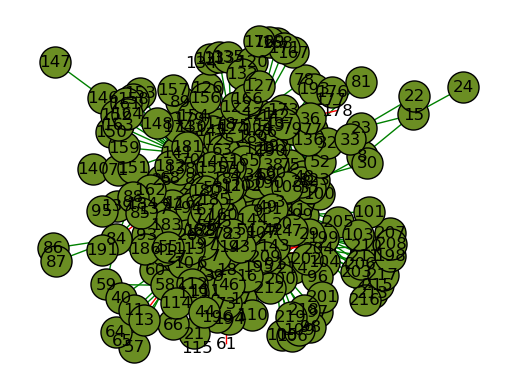

<Figure size 800x600 with 0 Axes>

Total time taken: 0:00:00.830940


In [8]:
start_time = time.monotonic()

# ==> Note 1: We can use this code to read the graph from the text file, 
# but use the same file to visulize clusters and for checking balance or not

# code set 1
# Read the signed graph from the text file
file_path = r"/Users/mac/Desktop/Desktop/RCS_Signed_Graph/Meeting_1/graph_test_files/convote.txt"

# preparing edges to check whether the graph is balanced or not
graph = read_signed_graph_from_file(file_path)

# preparing edges to color the node clusters
edges = []
with open(file_path, "r") as file:
    for line in file:
        #u, v, sign = map(int, line.strip().split("\t"))
        u, v, sign = map(int, re.split(r'\t|\s+', line.strip()))
        edges.append((u, v, {'sign': sign}))
# --------------------------------------------------------------------------------------------------------------

# ==> Note 2: We can use this code to generate random graph

# # code set 2
# # Generate random graph:        
# n_vertices = 7
# p_plus = 0.3
# p_minus = 0.2
# edges = generate_random_signed_graphs(n_vertices, p_plus, p_minus)
# graph = preparing_graph_edges(edges)
# ----------------------------------------------------------------------------------------------------------------
# use any one code set above



nodes = list(graph.keys())

# to store postive & negative connected nodes 
pos = dict()
neg = dict()

# to store all positive node values 
all_pos_node = []

# to store all possible positive clusters: it is in list(list) which is easy in this case to access
clu = list(list())

# find the postive and negative connected nodes and store them in respective object
find_pos_and_neg(graph)

# find the positive cluster pairs and store them
generate_cluster(clu, all_pos_node)

# check for graph balanced or not based on the condition that we understood. 
# Condition given below
is_balanced = check_balanced(clu, neg)

if(is_balanced == 0):
    print("Hence graph is not balanced")
if(is_balanced == 1):
    print("Graph is balanced")
if(is_balanced == 2):
    print("Hence graph is weakly balanced") 

# Create a signed graph
signed_graph = nx.Graph()
signed_graph.add_edges_from(edges)

# Visualization
pos = nx.spring_layout(signed_graph)
positive_edges = [(u, v) for u, v, data in signed_graph.edges(data=True) if data['sign'] == 1]
negative_edges = [(u, v) for u, v, data in signed_graph.edges(data=True) if data['sign'] == -1]

all_colors = list(mcolors.CSS4_COLORS.keys())
random.shuffle(all_colors)

# Create a dictionary to map clusters to colors
cluster_colors = {tuple(cluster): all_colors[i % len(all_colors)] for i, cluster in enumerate(clu)}

for cluster in clu:
    color = cluster_colors[tuple(cluster)]
    nx.draw_networkx_nodes(signed_graph, pos, nodelist = cluster, node_color=color, node_size=500, edgecolors='black', linewidths=1.0)
nx.draw_networkx_edges(signed_graph, pos, edgelist=positive_edges, edge_color='green')
nx.draw_networkx_edges(signed_graph, pos, edgelist=negative_edges, edge_color='red')
nx.draw_networkx_labels(signed_graph, pos, font_size=12, font_color='black')

plt.axis('off')
plt.figure(figsize=(8,6))
plt.show()

end_time = time.monotonic()
print("Total time taken:",timedelta(seconds=end_time - start_time))